In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

(612, 643)


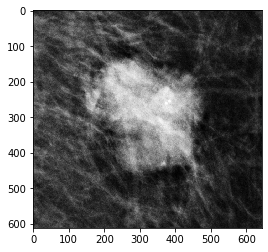

In [2]:
image = '/home/cot12/Documents/test-folder/abnormaility-cuts/image_12-16-2019_1.jpg'
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1 = 1232 - 150
x2 = 1561 + 164
y1 = 1897 - 150
y2 = 2209 + 150
diffx = x2 - x1
diffy = y2 - y1

LMLOml = np.zeros((diffy, diffx))
for j in range(y1, y2):
    for k in range(x1, x2):
        LMLOml[j-y1,k-x1] = beginning_image[j,k-7]
        
plt.imshow(LMLOml, cmap = 'gray')
print(LMLOml.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LMLO.jpg',LMLOml)
#this just cuts out the abnomaility

(604, 643)


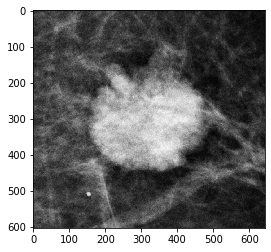

In [3]:
image = '/home/cot12/Documents/test-folder/abnormaility-cuts/image_12-16-2019_0.jpg'
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1 = 991 - 150
x2 = 1334 + 150
y1 = 2126 - 150
y2 = 2430 + 150
diffx = x2 - x1
diffy = y2 - y1

LMLOcc = np.zeros((diffy, diffx))
for j in range(y1, y2):
    for k in range(x1, x2):
        LMLOcc[j-y1,k-x1] = beginning_image[j,k]
        
plt.imshow(LMLOcc, cmap = 'gray')
print(LMLOcc.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-CC.jpg',LMLOcc)
#this just cuts out the abnomaility

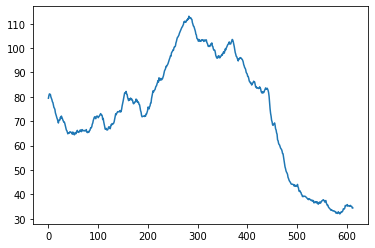

In [4]:
imageLMLO = '/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LMLO.jpg'
pylvlml = cv2.imread(imageLMLO,0)
x1ml = 1232 - 150
x2ml = 1561 + 164
z1ml = 1897 - 150
z2ml = 2209 + 150
diffxml = x2ml - x1ml
diffzml = z2ml - z1ml
array_valuesml = []
for j in range(0, diffzml):
    valueml = np.sum(pylvlml[:,j])/diffxml
    array_valuesml.append(valueml)
zml = np.array(array_valuesml)
xml = np.linspace(0, diffzml, diffzml)
plt.plot(xml, zml)

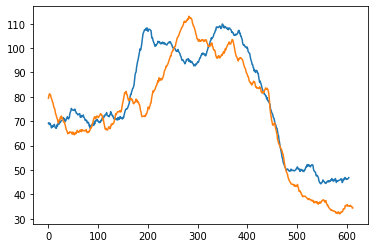

In [5]:
x1cc = 991 - 150
x2cc = 1334 + 150
y1cc = 2126 - 150
y2cc = 2430 + 150
diffxcc = x2cc - x1cc
diffycc = y2cc - y1cc


imageLCC = '/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LCC.jpg'
pylvlcc = cv2.imread(imageLCC,0)
array_valuescc = []
for j in range(0, diffycc):
    valuecc = np.sum(pylvlcc[:,j])/diffxcc
    array_valuescc.append(valuecc)
ycc = np.array(array_valuescc)
xcc = np.linspace(0, diffycc, diffycc)
plt.plot(xcc, ycc)
plt.plot(xml, zml)

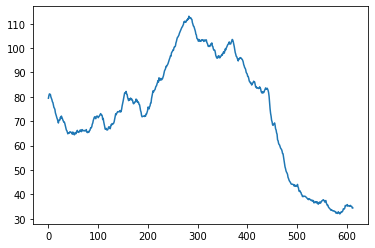

In [6]:
array_valuesml = []
for j in range(0, diffzml):
    valueml = np.sum(pylvlml[:,j])/diffxml
    array_valuesml.append(valueml)
zml = np.array(array_valuesml)
xml = np.linspace(0, diffzml, diffzml)
plt.plot(xml, zml)

[]

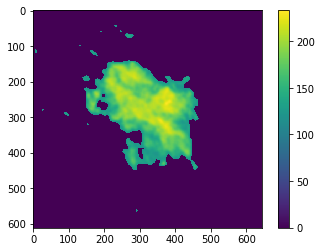

In [9]:
LMLO_density = np.zeros((diffzml, diffxml))
u = 5
for i in range(u, diffzml-u):
    for j in range(u, diffxml-u):
        
        lum = np.sum(LMLOml[i-u:i+u,j-u:j+u])/(len(LMLOml[i-u:i+u,j-u:j+u])**2)
        if lum >= 120:
            LMLO_density[i,j] = lum
        else:
            LMLO_density[i,j] = 0
plt.imshow(LMLO_density, cmap = 'gray')
plt.imshow(LMLO_density[:,:])
plt.colorbar()
plt.plot()

[]

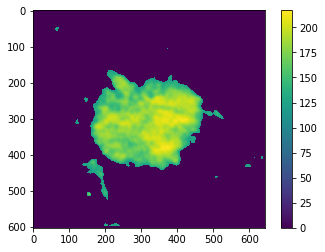

In [11]:
cc_density = np.zeros((diffycc, diffxcc))
u = 5
for i in range(u, diffycc-u):
    for j in range(u, diffxcc-u):
        
        lum = np.sum(LMLOcc[i-u:i+u,j-u:j+u])/(len(LMLOcc[i-u:i+u,j-u:j+u])**2)
        if lum >= 120:
            cc_density[i,j] = lum
        else:
            cc_density[i,j] = 0
plt.imshow(cc_density, cmap = 'gray')
plt.imshow(cc_density[:,:])
plt.colorbar()
plt.plot()


In [29]:
list = []
for i in range(0, diffycc):
    if ycc[i] <= zml[i]:
        list.append(xcc[i])

In [30]:
a = 188 - 100
b = 439 + 100
print(a,b)
print(diffxml, diffycc, diffzml)
print(pylvlml.shape)
print(pylvlcc.shape)
print(pylvlml)

88 539
643 604 612
(612, 643)
(604, 643)
[[38 46 46 ... 47 49 62]
 [50 43 38 ... 47 57 70]
 [52 43 54 ... 58 66 63]
 ...
 [77 68 73 ... 43 47 45]
 [66 71 68 ... 49 52 50]
 [69 58 66 ... 54 57 54]]


In [31]:
import sys
error = 10
dimesion_array = np.zeros((diffycc, diffxml, diffzml))
for k in range(0, diffzml):
    for j in range(0, diffycc):
        for i in range(0, diffxml):
                if LMLOcc[j,i] - error <= LMLOml[k,i] <= LMLOcc[j,i] + error:
                    dimesion_array[j,i,k] = LMLOml[k,i]

In [32]:
print(diffxml, diffycc, diffzml)

643 604 612


In [33]:
import sys
dimesional_array = np.zeros((diffxml,diffycc, diffzml))
for k in range(0, diffzml):
    for j in range(0, diffycc):
        for i in range(0, diffxml):
            if cc_density[j,i] > 0 and LMLO_density[k,i] > 0:
                dimesional_array[i,j,k] = 1

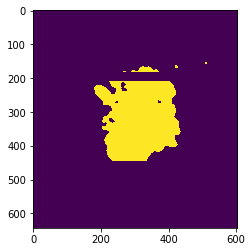

In [34]:
plt.imshow(dimesional_array[:,:,250])

In [35]:
x = []
y = []
z = []
for k in range(0, diffzml):
    for j in range(0, diffycc):
        for i in range(0, diffxml):
            if dimesional_array[i,j,k] == 1:
                x.append(i)
                y.append(j)
                z.append(k)
    
    
    


7836343.0


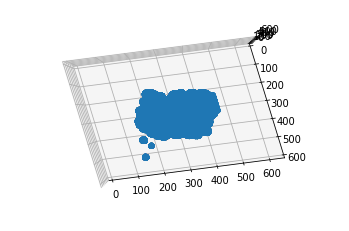

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_xlim3d(diffxml,0)
ax.set_ylim3d(0,diffycc)
ax.set_zlim3d(0, diffzml)
ax.view_init(90,80)
print(np.sum(dimesional_array))

7836343.0


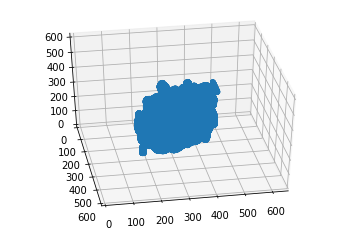

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_xlim3d(diffxml,0)
ax.set_ylim3d(0,diffycc)
ax.set_zlim3d(0, diffzml)
ax.view_init(40,80)
print(np.sum(dimesional_array))